In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
ruta_train= os.path.join('train'+'.csv')
data_train = pd.read_csv(ruta_train)
data_train.sample(20)

ruta_test= os.path.join('test'+'.csv')
data_test = pd.read_csv(ruta_test)

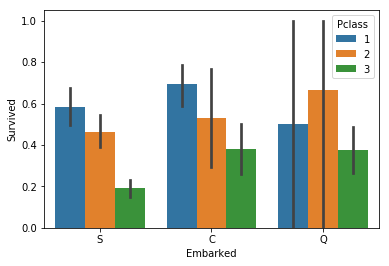

In [2]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=data_train)
plt.show()

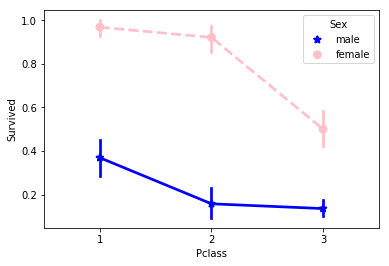

In [3]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [4]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [6]:
simplify_ages(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,30.0708,NaN,C


In [7]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

In [8]:
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

In [9]:
simplify_fares(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,1_quartile,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,4_quartile,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,1_quartile,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,4_quartile,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,2_quartile,NaN,S
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,2_quartile,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,4_quartile,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,3_quartile,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,2_quartile,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,3_quartile,NaN,C


In [10]:
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(',')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(',')[1])
    df['NamePrefix'] = df.NamePrefix.apply(lambda x: x.split(' ')[1])
    return df    

In [11]:
format_name(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,1_quartile,NaN,S,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,4_quartile,C85,C,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,1_quartile,NaN,S,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,4_quartile,C123,S,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,2_quartile,NaN,S,Allen,Mr.
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,2_quartile,NaN,Q,Moran,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,4_quartile,E46,S,McCarthy,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,3_quartile,NaN,S,Palsson,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,2_quartile,NaN,S,Johnson,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,3_quartile,NaN,C,Nasser,Mrs.


In [12]:
def drop_features(df):
    return df.drop(['Ticket', 'Name'], axis=1)

In [13]:
drop_features(data_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,NaN,S,Braund,Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C85,C,Cumings,Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,NaN,S,Heikkinen,Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C123,S,Futrelle,Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,NaN,S,Allen,Mr.
5,6,0,3,male,Unknown,0,0,2_quartile,NaN,Q,Moran,Mr.
6,7,0,1,male,Adult,0,0,4_quartile,E46,S,McCarthy,Mr.
7,8,0,3,male,Baby,3,1,3_quartile,NaN,S,Palsson,Master.
8,9,1,3,female,Young Adult,0,2,2_quartile,NaN,S,Johnson,Mrs.
9,10,1,2,female,Teenager,1,0,3_quartile,NaN,C,Nasser,Mrs.


In [14]:
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

In [15]:
train_clean=transform_features(data_train)
test_clean=transform_features(data_test)

ValueError: fill value must be in categories

In [ ]:
train_clean

In [16]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix','Embarked']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test


In [17]:
encode_features()

NameError: name 'df_train' is not defined

In [65]:
le

LabelEncoder()